<a href="https://colab.research.google.com/github/Nik8x/Breast_Cancer/blob/master/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](http://www.cs.wisc.edu/~olvi/uwmp/92_5622_www.gif)

['breast-cancer-wisconsin-data-kaggle-link'](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2)

[breast-cancer-wisconsin-data-uci-link](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

In [0]:
# The goal is to classify whether the breast cancer is benign or malignant. 

In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Fit with polyfit
from numpy.polynomial.polynomial import polyfit

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")
sns.set(color_codes = True)
plt.style.use('ggplot')

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder

#Feature Scaling
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from scipy.stats import skew

from multiprocessing import Process

import time    
import datetime

In [3]:
bc = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',  names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'])

bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
bc.shape

(569, 33)

In [5]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
bc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
from IPython.core.display import display, HTML
display(HTML("""<p class="normal">1) ID number
<br>2) Diagnosis (M = malignant, B = benign)
<br>3-32)
<br>
<br>Ten real-valued features are computed for each cell nucleus:
<br>
<br>	a) radius (mean of distances from center to points on the perimeter)
<br>	b) texture (standard deviation of gray-scale values)
<br>	c) perimeter
<br>	d) area
<br>	e) smoothness (local variation in radius lengths)
<br>	f) compactness (perimeter^2 / area - 1.0)
<br>	g) concavity (severity of concave portions of the contour)
<br>	h) concave points (number of concave portions of the contour)
<br>	i) symmetry 
<br>	j) fractal dimension ("coastline approximation" - 1)</p>"""))

In [8]:
x = pd.DataFrame(bc.isnull().sum())
x[x[0] > 0].T

,Unnamed: 32
0,569


In [0]:
del bc['Unnamed: 32']

In [10]:
bc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [0]:
labelencoder = LabelEncoder()
bc.diagnosis = labelencoder.fit_transform(bc.diagnosis)

In [12]:
bc.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


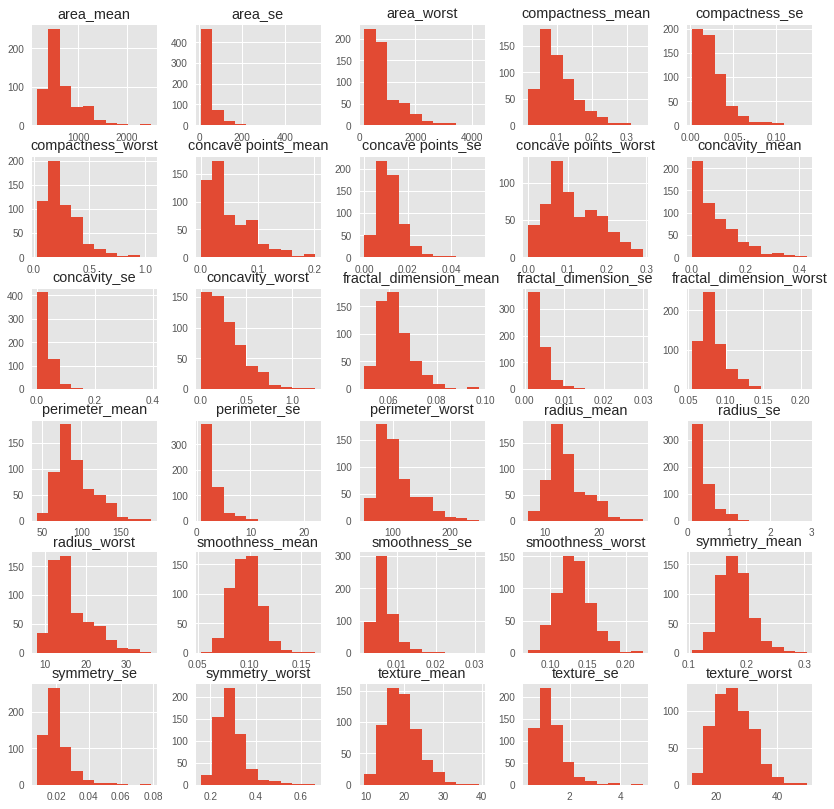

In [13]:
bc.drop(['id', 'diagnosis'], axis = 1).hist(figsize = (14, 14))
plt.show()

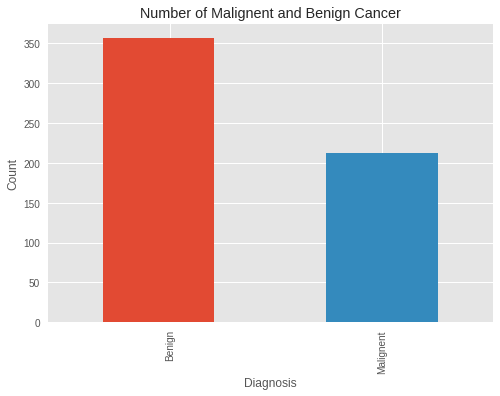

In [14]:
bc.diagnosis.value_counts().plot(kind = 'bar')
#or # subdata.Year.value_counts().plot.bar()
plt.title('Number of Malignent and Benign Cancer')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([.05 ,1], ['Benign', 'Malignent'])
plt.show()

In [0]:
# We can observe our data has more Benign diagnosis.

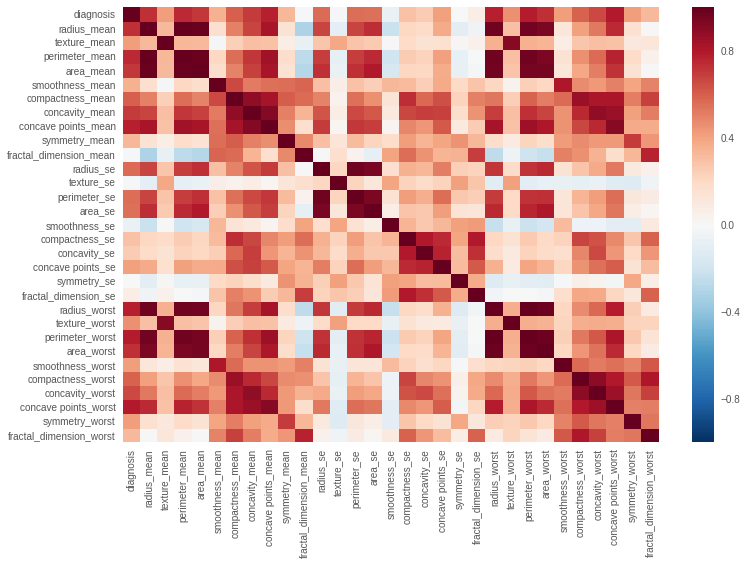

In [16]:
#bc.drop(['id'], axis = 1).corr().style.background_gradient().set_precision(2)
plt.figure(figsize = (12, 8))
sns.heatmap(bc.drop(['id'], axis = 1).corr())
plt.show()

In [17]:
pd.DataFrame(bc.drop(['id'], axis = 1).corr()['diagnosis'].sort_values(ascending = False)[1:12]).T #top 15 values

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean
diagnosis,0.793566,0.782914,0.776614,0.776454,0.742636,0.733825,0.730029,0.708984,0.69636,0.65961,0.596534


In [18]:
pd.DataFrame(bc.drop(['id'], axis = 1).corr()['diagnosis'].sort_values(ascending = False)[-5:]).T #last 5 values`

,fractal_dimension_se,symmetry_se,texture_se,fractal_dimension_mean,smoothness_se
diagnosis,0.077972,-0.006522,-0.008303,-0.012838,-0.067016


In [0]:
# We can observe that our diagnosis is highly correlated with radius_mean, perimeter_mean, area_mean, 
# concave points_mean(number of concave portions of the contour)

In [0]:
# Let's plot the ones with high correlation with diagnosis

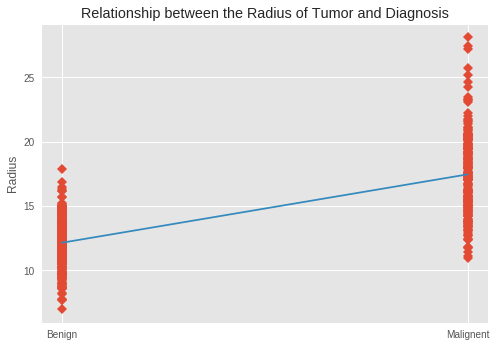

In [21]:
results = sm.OLS(bc.diagnosis, bc.radius_mean).fit()

b, m = polyfit(bc.diagnosis, bc.radius_mean, 1)

plt.plot(bc.diagnosis, bc.radius_mean, 'D')
plt.plot(bc.diagnosis, b + m * bc.diagnosis, '-')

plt.xticks([0.0 ,1.0], ['Benign', 'Malignent'])
plt.ylabel('Radius')
plt.title('Relationship between the Radius of Tumor and Diagnosis')
plt.show()

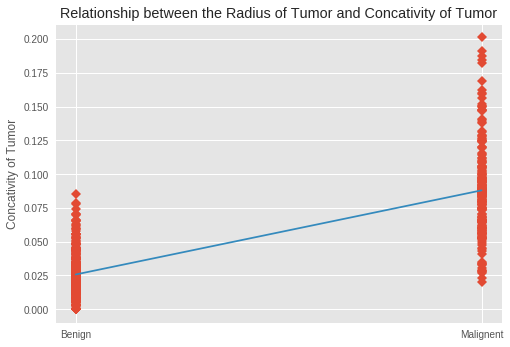

In [22]:
results = sm.OLS(bc.diagnosis, bc['concave points_mean']).fit()

b, m = polyfit(bc.diagnosis, bc['concave points_mean'], 1)

plt.plot(bc.diagnosis, bc['concave points_mean'], 'D')
plt.plot(bc.diagnosis, b + m * bc.diagnosis, '-')

plt.xticks([0.0 ,1.0], ['Benign', 'Malignent'])
plt.ylabel('Concativity of Tumor')
plt.title('Relationship between the Radius of Tumor and Concativity of Tumor')
plt.show()

In [0]:
# We can observe that the Malignant tumors are more concave and have more radius, this is true for the area or the perimeter also

In [0]:
X = bc.drop(['id', 'diagnosis'], axis = 1)
y = bc.diagnosis

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [0]:
# We need to bring all features to the same level of magnitudes. This is done by scaling. 

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
def model_clf(x):
    model = x
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_clf.cm = confusion_matrix(y_test, y_pred)
    model_clf.modl = str(x).split("(")[0]
    model_clf.accuracy = accuracy_score(y_test, y_pred)

In [0]:
models_list = [LogisticRegression(random_state = 1234),
             
               KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2),
             
               SVC(kernel = 'linear', random_state = 1234),
             
               SVC(kernel = 'rbf', random_state = 1234),
             
               GaussianNB(),
             
               DecisionTreeClassifier(criterion = 'entropy', random_state = 1234),
             
               RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 1234),
             
               XGBClassifier(base_score = 0.5, colsample_bylevel = 1, colsample_bytree = 1,
                                   gamma = 0, learning_rate = 0.1, max_delta_step = 0, max_depth = 1,
                                   min_child_weight = 1, missing = None, n_estimators = 700, nthread = -1,
                                   objective = 'binary:logistic', reg_alpha = 0, reg_lambda = 1,
                                   scale_pos_weight = 1, seed = 1234, silent = True, subsample = 1),
             
               GradientBoostingClassifier(random_state = 1234)]

In [30]:
start_time = time.clock()

name = []
accuracy = []
conf = []
for mdl in models_list:
    model_clf(mdl)
    name.append(model_clf.modl)
    accuracy.append(model_clf.accuracy)
    conf.append(model_clf.cm)
    
print(time.clock() - start_time, "seconds")

df_ac = pd.DataFrame({'Model Name': name, 
              'Accuracy' : accuracy, 
              'Confusion Matrix' : conf}).set_index('Model Name')


df_ac

0.6205879999999997 seconds


,Accuracy,Confusion Matrix
Model Name,,
LogisticRegression,0.965035,"[[88, 0], [5, 50]]"
KNeighborsClassifier,0.944056,"[[88, 0], [8, 47]]"
SVC,0.958042,"[[87, 1], [5, 50]]"
SVC,0.958042,"[[88, 0], [6, 49]]"
GaussianNB,0.902098,"[[84, 4], [10, 45]]"
DecisionTreeClassifier,0.923077,"[[86, 2], [9, 46]]"
RandomForestClassifier,0.958042,"[[88, 0], [6, 49]]"
XGBClassifier,0.951049,"[[88, 0], [7, 48]]"
GradientBoostingClassifier,0.937063,"[[87, 1], [8, 47]]"


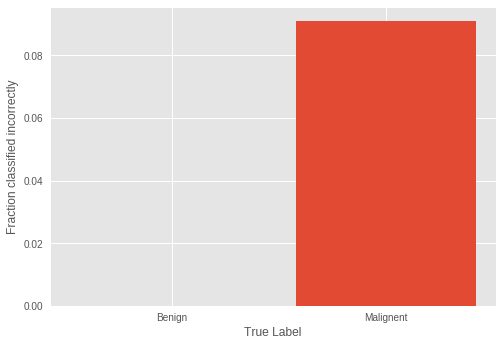

In [31]:
label_frac_error = 1 - np.diag(df_ac['Confusion Matrix'][:1][0]) / np.sum(df_ac['Confusion Matrix'][:1][0], axis=1)
plt.bar(np.arange(2), label_frac_error)
plt.xlabel('True Label')
plt.xticks([.05 ,1], ['Benign', 'Malignent'])
plt.ylabel('Fraction classified incorrectly')
plt.show()

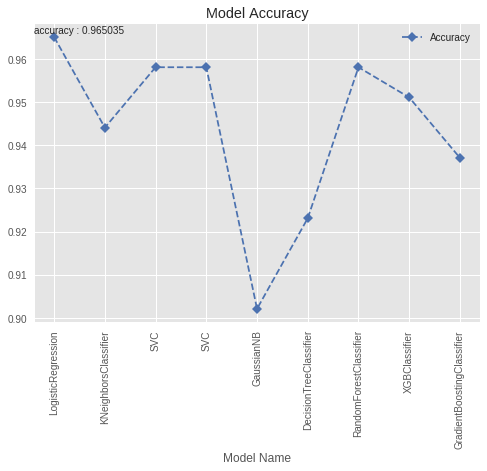

In [32]:
df_ac['Accuracy'].plot(linestyle = '--', marker = 'D', color = 'b')
plt.xticks(np.arange(0, 9), list(df_ac.index), rotation = 90)
plt.title('Model Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.annotate('accuracy : 0.965035', xy=(-0.4, 0.966))
plt.show()

In [0]:
# Logistic Regression models seems to be outperforming other models.

In [0]:
# # let's look at the important columns in the model with the best accuracy, ie Logistic Regression

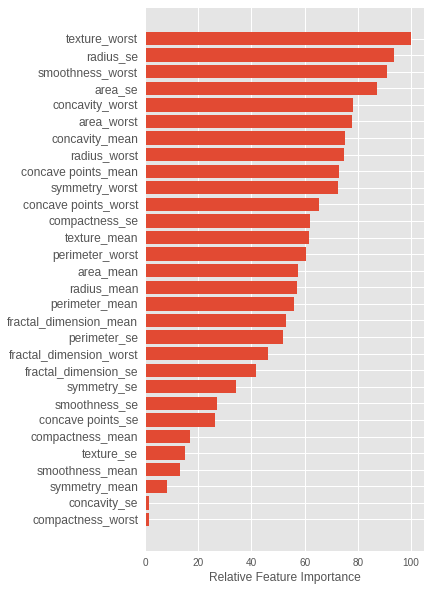

In [35]:
m = LogisticRegression(random_state = 1234).fit(X_train, y_train)

feature_importance = abs(m.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize = (5, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, (np.array(X.columns)[sorted_idx]), fontsize = 12)
plt.xlabel('Relative Feature Importance')
 
plt.show()

In [0]:
# texture, radius, smoothness, and area impacts our model for classifying between benign and malignant